## Ejercicio Modulo 5 de Machine learning de Carlos Pamias Mora


In [1]:
import random
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, QuantileTransformer,OneHotEncoder,RobustScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error,silhouette_score,precision_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score,mean_squared_error,recall_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline,make_pipeline
from time import time
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
import tensorflow as tf
keras = tf.keras


Cargamos el dataset y exploramos el conjunto de datos:

In [2]:
# Cargar el dataset
df = pd.read_csv('airbnb_nyc_clean.csv')
df.head()

id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                             blank  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long  instant_bookable  ...  price service_fee  \
0  40.64749 -73.97237             False  ...  966.0       193.0   
1  40.75362 -73.98377             False  ...  142.0        28.0   
2  40.80902 -73.94190              True  ...  620.0       124.0   
3  40.68514 -73.95976              True  ...  368.0        74.0   
4  40.79851 -73.94399             False  ...  204.0        41.0   

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0            10.0                9.0   2021-10-19               0.21   
1            13.0               45.0   2022-05-21               0.38   
2             3.0                0.0   2019-06-14               0.79   
3            13.0              270.0   2019-07-05               4.64   
4            10.0                9.0   2018-11-19               0.10   

   review_rate_number calculated_host_listings_count  availability_365  \
0                 4.0                            6.0             286.0   
1                 4.0                            2.0             228.0   
2                 5.0                            1.0             352.0   
3                 4.0                            1.0             322.0   
4                 3.0                            1.0             289.0   

                                         house_rules  
0  Clean up and treat the home the way you'd like...  
1  Pet friendly but please confirm with me if the...  
2  I encourage you to use my kitchen, cooking and...  
3                                              blank  
4  Please no smoking in the house, porch or on th...  

[5 rows x 23 columns]

Se verifican si hay duplicados


In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:

# Convertir last_review a datetime y extraer año, mes y día
df['last_review'] = pd.to_datetime(df['last_review'])
df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month
df['day'] = df['last_review'].dt.day

# Eliminar columnas
df.drop(columns=['id', 'host_id', 'host_name', 'last_review'], inplace=True)
# Mostramos las primeras filas del dataframe modificado
df.head()


name host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !            unconfirmed   
3                                             blank            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  neighbourhood_group neighbourhood       lat      long  instant_bookable  \
0            Brooklyn    Kensington  40.64749 -73.97237             False   
1           Manhattan       Midtown  40.75362 -73.98377             False   
2           Manhattan        Harlem  40.80902 -73.94190              True   
3            Brooklyn  Clinton Hill  40.68514 -73.95976              True   
4           Manhattan   East Harlem  40.79851 -73.94399             False   

  cancellation_policy        room_type  construction_year  ...  \
0              strict     Private room             2020.0  ...   
1            moderate  Entire home/apt             2007.0  ...   
2            flexible     Private room             2005.0  ...   
3            moderate  Entire home/apt             2005.0  ...   
4            moderate  Entire home/apt             2009.0  ...   

   minimum_nights  number_of_reviews  reviews_per_month  review_rate_number  \
0            10.0                9.0               0.21                 4.0   
1            13.0               45.0               0.38                 4.0   
2             3.0                0.0               0.79                 5.0   
3            13.0              270.0               4.64                 4.0   
4            10.0                9.0               0.10                 3.0   

   calculated_host_listings_count  availability_365  \
0                             6.0             286.0   
1                             2.0             228.0   
2                             1.0             352.0   
3                             1.0             322.0   
4                             1.0             289.0   

                                         house_rules  year month  day  
0  Clean up and treat the home the way you'd like...  2021    10   19  
1  Pet friendly but please confirm with me if the...  2022     5   21  
2  I encourage you to use my kitchen, cooking and...  2019     6   14  
3                                              blank  2019     7    5  
4  Please no smoking in the house, porch or on th...  2018    11   19  

[5 rows x 22 columns]

In [5]:
print('Tamaño del DataFrame:', df.shape)

Tamaño del DataFrame: (69305, 22)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            69305 non-null  object 
 1   host_identity_verified          69305 non-null  object 
 2   neighbourhood_group             69305 non-null  object 
 3   neighbourhood                   69305 non-null  object 
 4   lat                             69305 non-null  float64
 5   long                            69305 non-null  float64
 6   instant_bookable                69305 non-null  bool   
 7   cancellation_policy             69305 non-null  object 
 8   room_type                       69305 non-null  object 
 9   construction_year               69305 non-null  float64
 10  price                           69305 non-null  float64
 11  service_fee                     69305 non-null  float64
 12  minimum_nights                  

Se verifican si hay nulos

In [7]:
df.isna().sum()

name                              0
host_identity_verified            0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
year                              0
month                             0
day                               0
dtype: int64

* Quitar columnas: id, host_id, host_name
* Fecha: probar a descomponer la fecha en campos año mes y día con pandas es decir, en 3 columnas, por ejemplo usando to_datetime de pandas y los accesores de fecha para extraer año mes y día.

Mostamos las columnas del DataFrame en una lista.

In [9]:
columnas = df.columns.tolist() 
columnas

['name',
 'host_identity_verified',
 'neighbourhood_group',
 'neighbourhood',
 'lat',
 'long',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'price',
 'service_fee',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365',
 'house_rules',
 'year',
 'month',
 'day']

## Analisis EDA
### Obtenemos los valores únicos de la columna categoricas.

Analizamos los datos categoricos

* Barrios:

In [10]:
barrios = df['neighbourhood_group'].value_counts()
barrios

neighbourhood_group
Manhattan        29587
Brooklyn         27895
Queens            9262
Bronx             1912
Staten Island      649
Name: count, dtype: int64

* Vecindarios:

In [11]:
vecindarios = df['neighbourhood'].value_counts()
vecindarios

neighbourhood
Bedford-Stuyvesant        5331
Williamsburg              5079
Harlem                    3659
Bushwick                  3270
Hell's Kitchen            2817
                          ... 
Manhattan Avenue             1
Driggs Avenue                1
East 14th Street             1
Fort Wadsworth               1
Chelsea, Staten Island       1
Name: count, Length: 239, dtype: int64

* Politica de cancelación

In [12]:
politica_de_cancelacion = df['cancellation_policy'].value_counts()
politica_de_cancelacion

cancellation_policy
moderate    23244
flexible    23126
strict      22935
Name: count, dtype: int64

Tipo de habitacion

In [13]:
tipo_habitacion = df['room_type'].value_counts()
tipo_habitacion

room_type
Entire home/apt    37212
Private room       30508
Shared room         1470
Hotel room           115
Name: count, dtype: int64

Modificamos los tipos de datos

In [14]:
df[['year', "month", "day"]] = df[['year', "month", "day"]].astype("int")
df[['room_type', 'cancellation_policy' ]] = df[['room_type', 'cancellation_policy' ]].astype("category")

In [15]:
df.describe().map('{:,.0f}'.format)

lat    long construction_year   price service_fee minimum_nights  \
count  69,305  69,305            69,305  69,305      69,305         69,305   
mean       41     -74             2,012     625         125              5   
std         0       0                 6     331          66              4   
min        40     -74             2,003      50          10              0   
25%        41     -74             2,008     339          68              2   
50%        41     -74             2,012     625         125              3   
75%        41     -74             2,017     911         182              6   
max        41     -74             2,022   1,200         240             13   

      number_of_reviews reviews_per_month review_rate_number  \
count            69,305            69,305             69,305   
mean                 28                 1                  3   
std                  52                 2                  1   
min                   0                 0                  1   
25%                   1                 0                  2   
50%                   7                 1                  3   
75%                  30                 2                  4   
max               1,024                90                  5   

      calculated_host_listings_count availability_365    year   month     day  
count                         69,305           69,305  69,305  69,305  69,305  
mean                               9              153   2,019       6      15  
std                               35              134       2       3       9  
min                                1              -10   2,012       1       1  
25%                                1               18   2,019       4       8  
50%                                1              127   2,019       6      14  
75%                                3              281   2,020       7      23  
max                              332              426   2,022      12      31

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            69305 non-null  object  
 1   host_identity_verified          69305 non-null  object  
 2   neighbourhood_group             69305 non-null  object  
 3   neighbourhood                   69305 non-null  object  
 4   lat                             69305 non-null  float64 
 5   long                            69305 non-null  float64 
 6   instant_bookable                69305 non-null  bool    
 7   cancellation_policy             69305 non-null  category
 8   room_type                       69305 non-null  category
 9   construction_year               69305 non-null  float64 
 10  price                           69305 non-null  float64 
 11  service_fee                     69305 non-null  float64 
 12  minimum_nights    

Separamos a otro DataFrame la columna Name para tratarla con posterioridad

In [17]:
# Separar la columna 'name'
df_names = df[['name', 'house_rules']]
df.drop(columns=['name', 'house_rules'], inplace=True)

In [18]:
df_names.head()

name  \
0                Clean & quiet apt home by the park   
1                             Skylit Midtown Castle   
2               THE VILLAGE OF HARLEM....NEW YORK !   
3                                             blank   
4  Entire Apt: Spacious Studio/Loft by central park   

                                         house_rules  
0  Clean up and treat the home the way you'd like...  
1  Pet friendly but please confirm with me if the...  
2  I encourage you to use my kitchen, cooking and...  
3                                              blank  
4  Please no smoking in the house, porch or on th...

### Univariantes: histogramas boxplot countplot

Histograma de Precios (price)

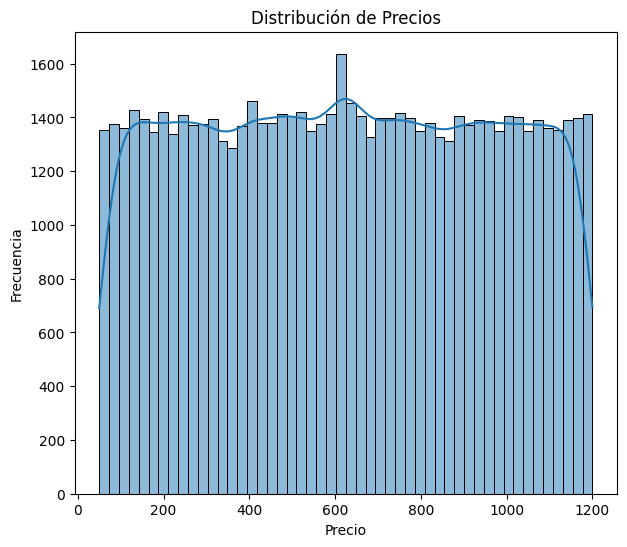

In [19]:
# Histograma de precios
plt.figure(figsize=(7, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Boxplot de Precios (price)

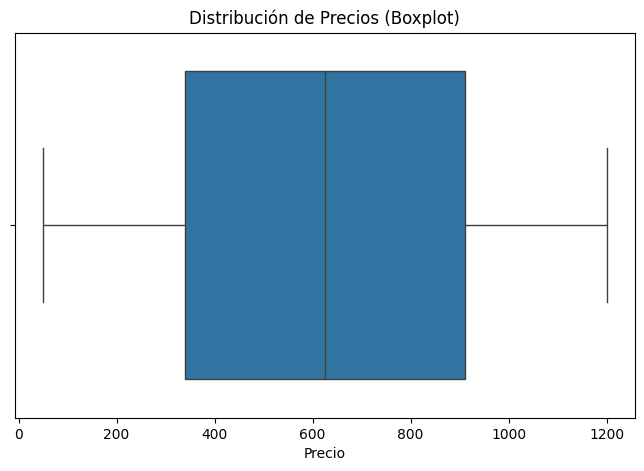

In [20]:
# Boxplot de precios
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Distribución de Precios (Boxplot)')
plt.xlabel('Precio')
plt.show()

Visualizamos las relaciones de barrios con vecindarios


In [21]:
fig = px.sunburst(df,
                  values='price',
                  path=['neighbourhood_group', 'neighbourhood'],
                  color= 'neighbourhood_group',
                  title='Relacion de los barrios con los vecindarios',
                  color_discrete_sequence=px.colors.qualitative.Vivid,  
                  hover_data={'price':':,.2f'})
fig.show()


Countplot para Tipo de Habitación (room_type)

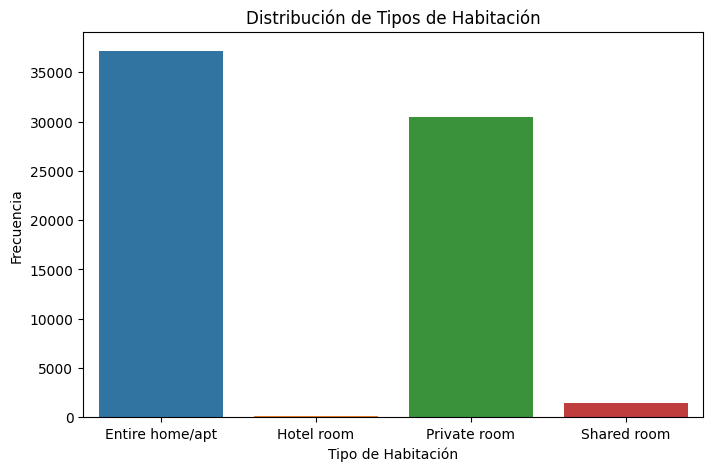

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', hue=df["room_type"])
plt.title('Distribución de Tipos de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Frecuencia')
plt.show()

In [23]:

# Boxplot
plt.figure(figsize=(10, 6))
px.box(x=df['price'])

<Figure size 1000x600 with 0 Axes>

### Análisis Bivariante (Scatterplot)
Relación entre price y number_of_reviews

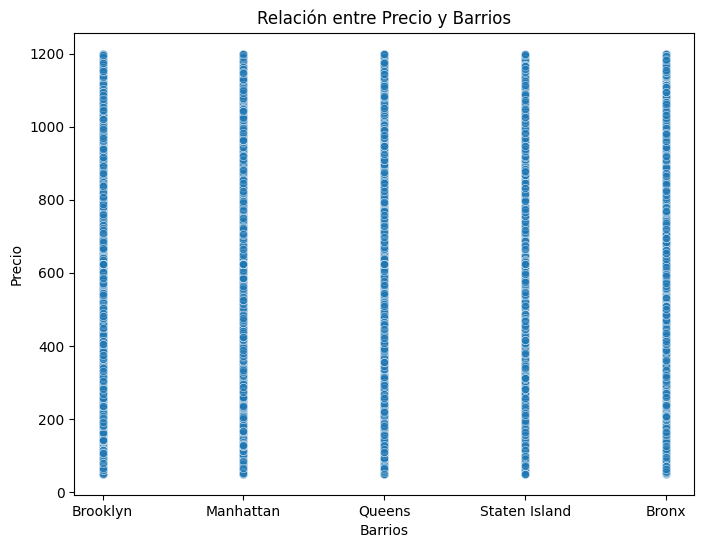

In [24]:
# Scatterplot: Precio vs Barrios
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='neighbourhood_group', y='price', alpha=0.6)
plt.title('Relación entre Precio y Barrios')
plt.xlabel('Barrios')
plt.ylabel('Precio')
plt.show()

Relación entre price y Tipos de habitación

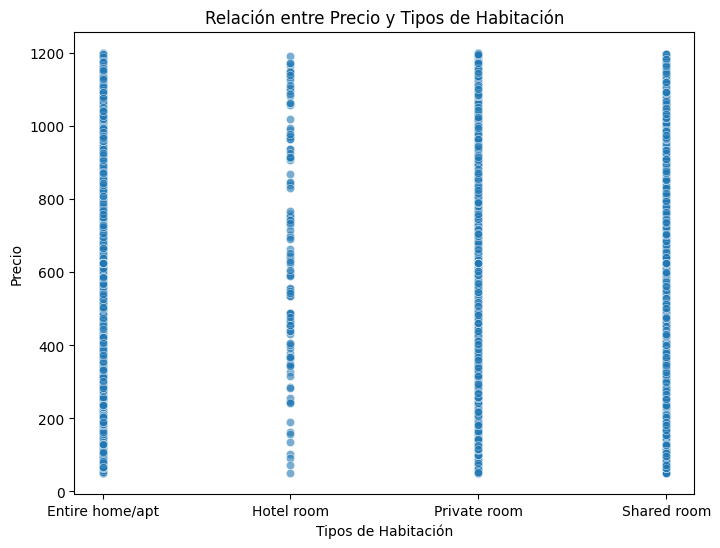

In [25]:
# Scatterplot: Precio vs Número de Reseñas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='room_type', y='price', alpha=0.6)
plt.title('Relación entre Precio y Tipos de Habitación')
plt.xlabel('Tipos de Habitación')
plt.ylabel('Precio')
plt.show()

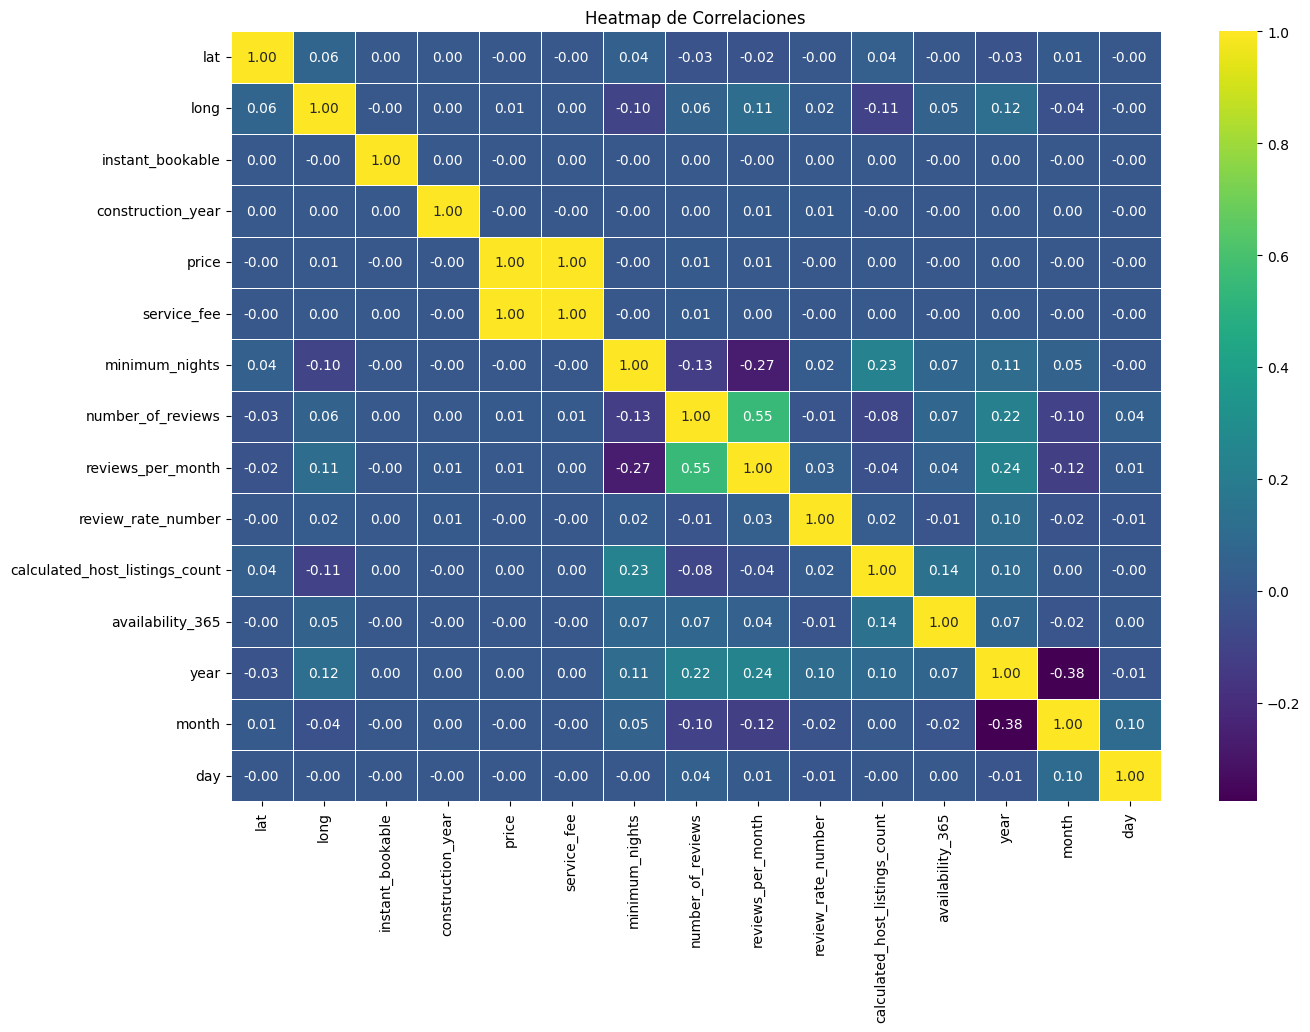

In [26]:
# Correlación en Heatmap
plt.figure(figsize=(15, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f")
plt.title('Heatmap de Correlaciones')
plt.show()

In [ ]:
# Obtenemos la media de la latitud y longitud para centrar el mapa con los precios
lat = np.mean(df['lat'])
lon = np.mean(df['long'])
fig = px.density_map(df, lat='lat', lon='long', z='price', radius=3,
                        center=dict(lat=lat, lon=lon), zoom=10,
                        color_continuous_scale='Viridis',
                        hover_data=['neighbourhood_group', 'neighbourhood', 'room_type'],
                        map_style="open-street-map")
fig.show()


Pairplot para Variables Numéricas Relevantes

In [ ]:
numeric_vars = ['price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'review_rate_number']

# Pairplot
sns.pairplot(df[numeric_vars], diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

Podemos usar un gráfico de cajas ( ) para ver cómo se distribuyen los precios según el tipo de habitación

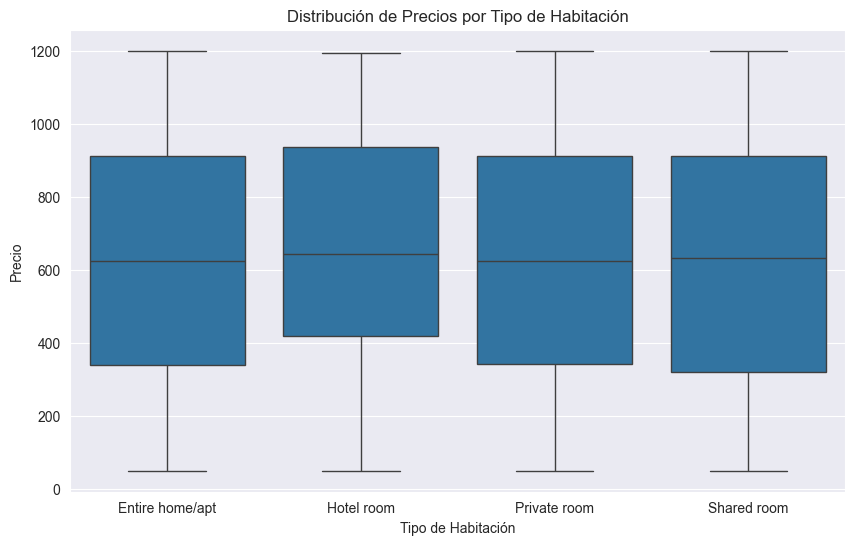

In [29]:
# Gráfico de cajas: Distribución de precios por tipo de habitación
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()

In [ ]:
# violin plot
px.violin(df, x='room_type', y='price', box=True, points="all", hover_data=df.columns)

## Preprocesados




Primero hacemos los preprocesados para la regresion para la clasificacion se hara con pypeline

In [31]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesado', 'R2', 'MAE', 'RMSE', 'MAPE'])
def calculate_metrics(preprocessor_name, X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
    }
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df_resultados.loc[len(df_resultados)] = [model_name, preprocessor_name, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred),root_mean_squared_error(y_test, y_pred),mean_absolute_percentage_error(y_test, y_pred)]
    
    return df_resultados.sort_values('R2', ascending=False)

In [33]:
# obtener nombres de columnas numéricas y categóricas
numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list() # np.number alternativa
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [34]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])
# Obtener nombres de las nuevas características (útil para crear DataFrames)
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
# pasarlo a dataframes de pandas y juntarlo con las numéricas para obtener resultado como pd.get_dummies
X_train_categorical = pd.DataFrame(X_train_encoded, columns=encoded_feature_names).reset_index(drop=True)
X_test_categorical = pd.DataFrame(X_test_encoded, columns=encoded_feature_names).reset_index(drop=True)

# Concatenar con las características numéricas
X_train_final = pd.concat(
    [
        X_train_categorical,  # Categóricas codificadas
        X_train[numerical_columns].reset_index(drop=True)  # Numéricas
    ],
    axis=1
)

X_test_final = pd.concat(
    [
        X_test_categorical,  # Categóricas codificadas
        X_test[numerical_columns].reset_index(drop=True)  # Numéricas
    ],
    axis=1
)

In [35]:
X_train_final.shape, X_test_final.shape

((55444, 264), (13861, 264))

Al haber tantas columnas buscamos las mejores con SelectKbeast

In [36]:
# Creamos el selector
selector = SelectKBest(score_func=f_regression, k=20)  # Seleccionar las 20 mejores características

# Ajustamos el selector a los datos de entrenamiento
X_train_selected = selector.fit_transform(X_train_final, y_train)

# Aplicamos la selección a los datos de prueba
X_test_selected = selector.transform(X_test_final)

In [37]:
calculate_metrics('OneHotEncoder', X_train_selected, X_test_selected, y_train, y_test)

Modelo   Preprocesado        R2       MAE       RMSE      MAPE
0  LinearRegression  OneHotEncoder  0.994213  3.057560  25.157978  0.007921
1               KNN  OneHotEncoder  0.993362  4.351792  26.943484  0.011674
4      RandomForest  OneHotEncoder  0.993107  3.886340  27.457099  0.010248
3      DecisionTree  OneHotEncoder  0.991886  4.006069  29.788969  0.010530
2               SVR  OneHotEncoder  0.991558  6.110908  30.384747  0.023990

Probamos si mejora con StandardScaler y RobustScaler

In [38]:
scaler = StandardScaler()
scaler.fit(X_train_selected) 

X_train_scaled = scaler.transform(X_train_selected) # devuelve un array de numpy
X_test_scaled = scaler.transform(X_test_selected) # devuelve un array de numpy

calculate_metrics('StandardScaler', X_train_scaled, X_test_scaled, y_train, y_test)

Modelo    Preprocesado        R2        MAE       RMSE      MAPE
0  LinearRegression   OneHotEncoder  0.994213   3.057560  25.157978  0.007921
5  LinearRegression  StandardScaler  0.994213   3.057560  25.157978  0.007921
1               KNN   OneHotEncoder  0.993362   4.351792  26.943484  0.011674
9      RandomForest  StandardScaler  0.993132   3.879270  27.406821  0.010240
4      RandomForest   OneHotEncoder  0.993107   3.886340  27.457099  0.010248
6               KNN  StandardScaler  0.991895   5.563259  29.772266  0.015424
3      DecisionTree   OneHotEncoder  0.991886   4.006069  29.788969  0.010530
8      DecisionTree  StandardScaler  0.991881   4.010319  29.798647  0.010548
2               SVR   OneHotEncoder  0.991558   6.110908  30.384747  0.023990
7               SVR  StandardScaler  0.961803  24.225003  64.632737  0.089880

In [39]:
scaler = RobustScaler()
scaler.fit(X_train_selected) 

X_train_scaled = scaler.transform(X_train_selected) # devuelve un array de numpy
X_test_scaled = scaler.transform(X_test_selected) # devuelve un array de numpy

calculate_metrics('RobustSacaler', X_train_scaled, X_test_scaled, y_train, y_test)

Modelo    Preprocesado        R2        MAE       RMSE      MAPE
0   LinearRegression   OneHotEncoder  0.994213   3.057560  25.157978  0.007921
5   LinearRegression  StandardScaler  0.994213   3.057560  25.157978  0.007921
10  LinearRegression   RobustSacaler  0.994213   3.057560  25.157978  0.007921
1                KNN   OneHotEncoder  0.993362   4.351792  26.943484  0.011674
9       RandomForest  StandardScaler  0.993132   3.879270  27.406821  0.010240
4       RandomForest   OneHotEncoder  0.993107   3.886340  27.457099  0.010248
14      RandomForest   RobustSacaler  0.993099   3.892009  27.471631  0.010242
11               KNN   RobustSacaler  0.992093   6.396579  29.406821  0.018462
6                KNN  StandardScaler  0.991895   5.563259  29.772266  0.015424
3       DecisionTree   OneHotEncoder  0.991886   4.006069  29.788969  0.010530
8       DecisionTree  StandardScaler  0.991881   4.010319  29.798647  0.010548
13      DecisionTree   RobustSacaler  0.991881   4.014002  29.798837  0.010542
2                SVR   OneHotEncoder  0.991558   6.110908  30.384747  0.023990
12               SVR   RobustSacaler  0.981006  16.004134  45.576635  0.062804
7                SVR  StandardScaler  0.961803  24.225003  64.632737  0.089880

Usamos QuantileTransformer para ver como se comporta

In [40]:
transformer = QuantileTransformer()
scaler.fit(X_train_selected) 

X_train_scaled = scaler.transform(X_train_selected) # devuelve un array de numpy
X_test_scaled = scaler.transform(X_test_selected) # devuelve un array de numpy

calculate_metrics('QuantileTransformer', X_train_scaled, X_test_scaled, y_train, y_test)

Modelo         Preprocesado        R2        MAE       RMSE  \
0   LinearRegression        OneHotEncoder  0.994213   3.057560  25.157978   
15  LinearRegression  QuantileTransformer  0.994213   3.057560  25.157978   
10  LinearRegression        RobustSacaler  0.994213   3.057560  25.157978   
5   LinearRegression       StandardScaler  0.994213   3.057560  25.157978   
1                KNN        OneHotEncoder  0.993362   4.351792  26.943484   
9       RandomForest       StandardScaler  0.993132   3.879270  27.406821   
4       RandomForest        OneHotEncoder  0.993107   3.886340  27.457099   
14      RandomForest        RobustSacaler  0.993099   3.892009  27.471631   
19      RandomForest  QuantileTransformer  0.993099   3.892009  27.471631   
11               KNN        RobustSacaler  0.992093   6.396579  29.406821   
16               KNN  QuantileTransformer  0.992093   6.396579  29.406821   
6                KNN       StandardScaler  0.991895   5.563259  29.772266   
3       DecisionTree        OneHotEncoder  0.991886   4.006069  29.788969   
8       DecisionTree       StandardScaler  0.991881   4.010319  29.798647   
13      DecisionTree        RobustSacaler  0.991881   4.014002  29.798837   
18      DecisionTree  QuantileTransformer  0.991881   4.014002  29.798837   
2                SVR        OneHotEncoder  0.991558   6.110908  30.384747   
12               SVR        RobustSacaler  0.981006  16.004134  45.576635   
17               SVR  QuantileTransformer  0.981006  16.004134  45.576635   
7                SVR       StandardScaler  0.961803  24.225003  64.632737   

        MAPE  
0   0.007921  
15  0.007921  
10  0.007921  
5   0.007921  
1   0.011674  
9   0.010240  
4   0.010248  
14  0.010242  
19  0.010242  
11  0.018462  
16  0.018462  
6   0.015424  
3   0.010530  
8   0.010548  
13  0.010542  
18  0.010542  
2   0.023990  
12  0.062804  
17  0.062804  
7   0.089880

* categóricas: imputer, encoder

##  Clustering y siluetas 
    * Crear una columna cluster usando KMeans o cualquier otro algoritmo de Clustering
    * Usar esa columna para hacer algún gráfico EDA como hue para colorear con 

Preparamos los datos

In [41]:
# Supongamos que nuestro DataFrame se llama df
numeric_features = ['price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365']

# Filtrar solo las características numéricas
X_cluster = df[numeric_features].copy()

# Escalar características con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

Aplicar KMeans y Crear Columna cluster

In [42]:
# Aplicar KMeans con k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [43]:
print('kmeans.labels_', kmeans.labels_[:10])
print('kmeans.cluster_centers_: \n', kmeans.cluster_centers_) # centroides
print('kmeans.inertia_', kmeans.inertia_)
print('silhouette_score', silhouette_score(X_scaled, kmeans.labels_))


kmeans.labels_ [1 1 0 0 1 0 1 1 2 0]
kmeans.cluster_centers_: 
 [[-0.86816386 -0.86835401 -0.46494059  0.06016877  0.11053872 -0.01139498
  -0.179633   -0.05876307]
 [-0.007133   -0.00718219  1.82863668 -0.23684688 -0.44400211  0.03712647
   0.13125435  0.18966238]
 [ 0.88035888  0.88060852 -0.46282652  0.07381453  0.10995869 -0.01256991
  -0.17860049 -0.05971387]
 [ 0.02101509  0.02027384  1.09801051 -0.4470582  -0.16080623  0.13592324
   6.54913075  0.60738651]]
kmeans.inertia_ 352386.4172250979
silhouette_score 0.2207714842153519


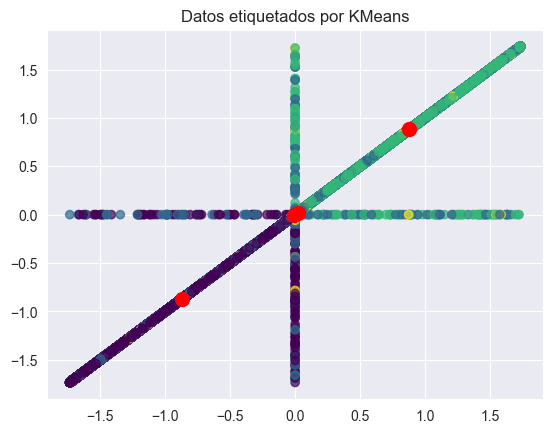

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100)
plt.title('Datos etiquetados por KMeans');

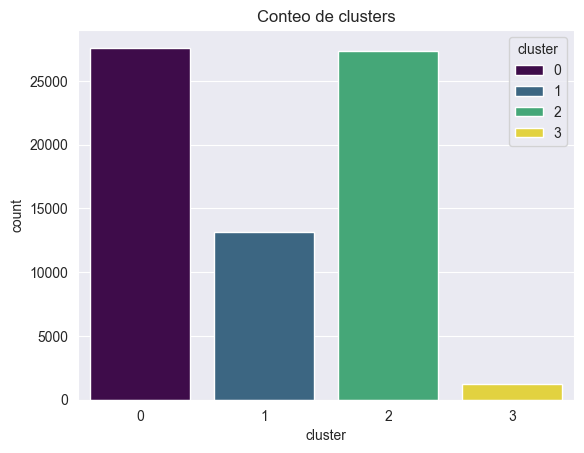

In [45]:
df_labels = pd.DataFrame({'cluster': kmeans.labels_})
sns.countplot(df_labels, x='cluster', palette='viridis', hue='cluster')
plt.title('Conteo de clusters');

## Feature selection
    * PCA 


Los unimos para PCA


In [46]:

X_final = pd.concat([X_train_final, X_test_final], axis=0).reset_index(drop=True)

X_final.shape


(69305, 264)

PCA

In [47]:
X1 = X_final.copy()
y1 = y.copy()

In [48]:
# Reducir la dimensionalidad a n_components componentes principales
n_components = 24  # Número de componentes principales
X_pca = PCA(n_components=n_components, random_state=42)
X_pca.fit(X1)
varianza = np.cumsum(X_pca.explained_variance_ratio_)

print('Varianza explicada:', X_pca.explained_variance_ratio_) 
print('varianza acumulada',varianza)

Varianza explicada: [6.82737473e-01 1.65330606e-01 1.02208912e-01 4.40389648e-02
 3.08574528e-03 1.24897351e-03 6.75043793e-04 3.38334104e-04
 8.72973518e-05 5.94621355e-05 5.68719011e-05 1.89073853e-05
 1.88300173e-05 1.55014351e-05 1.26159324e-05 1.25123395e-05
 9.41945307e-06 6.77443994e-06 2.81843090e-06 2.17241267e-06
 1.85311641e-06 1.49447007e-06 1.48049584e-06 1.39297182e-06]
varianza acumulada [0.68273747 0.84806808 0.95027699 0.99431596 0.9974017  0.99865067
 0.99932572 0.99966405 0.99975135 0.99981081 0.99986768 0.99988659
 0.99990542 0.99992092 0.99993354 0.99994605 0.99995547 0.99996224
 0.99996506 0.99996724 0.99996909 0.99997058 0.99997206 0.99997346]


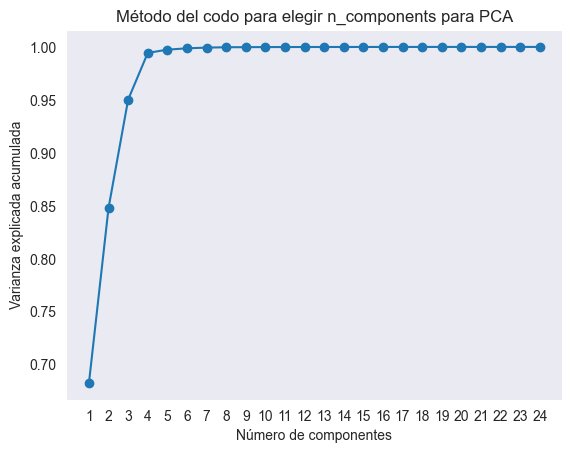

In [49]:
plt.plot(range(1, len(varianza) + 1), varianza, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title('Método del codo para elegir n_components para PCA')
plt.xticks(range(1, len(varianza) + 1))
plt.grid()

In [50]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X1)

px.scatter_3d(
    x=X_pca[:, 0], # componente principal 1
    y=X_pca[:, 1], # componente principal 2
    z=X_pca[:, 2], # componente principal 3
    color=y,
    color_continuous_scale='viridis',
    title='PCA 3D',
    labels={
        'x': 'componente principal 1',
        'y': 'componente principal 2',
        'z': 'componente principal 3'
    }
)

## Clasificación multiclase: Predecir la columna 'room_type'
* con Pipeline


In [51]:
df = pd.read_csv('airbnb_nyc_clean.csv')

In [52]:
# Separamos los datos para procesarlos sin inclir mas pesados
numeric_features = ['price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'review_rate_number', 'calculated_host_listings_count', 'availability_365']
categorical_features = ['neighbourhood_group', 'instant_bookable', 'cancellation_policy']

# Variables predictoras
X = df[numeric_features + categorical_features]
# Variable objetivo
y = df['room_type'].astype('category').cat.codes  # Codificar room_type como números


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputar valores faltantes con la mediana
    ('scaler', StandardScaler())  # Escalar características
])

In [55]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputar valores faltantes con "missing"
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar variables categóricas
])

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Aplicar pipeline numérico
        ('cat', categorical_transformer, categorical_features)  # Aplicar pipeline categórico
    ]
)

In [57]:
# Selector de características
feature_selector = SelectKBest(score_func=f_regression, k=15)  # Seleccionar las 15 mejores características

In [58]:
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('feature_selection', feature_selector),  # Selector de características    
    ('classifier', RandomForestClassifier(random_state=42))  # Modelo de clasificación
])
# Entrenar el pipeline
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline.predict(X_test)

In [59]:
# Mostrar informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      7429
           1       0.00      0.00      0.00        29
           2       0.62      0.58      0.60      6100
           3       0.35      0.06      0.10       303

    accuracy                           0.65     13861
   macro avg       0.41      0.34      0.35     13861
weighted avg       0.64      0.65      0.64     13861

Precisión del modelo: 0.65


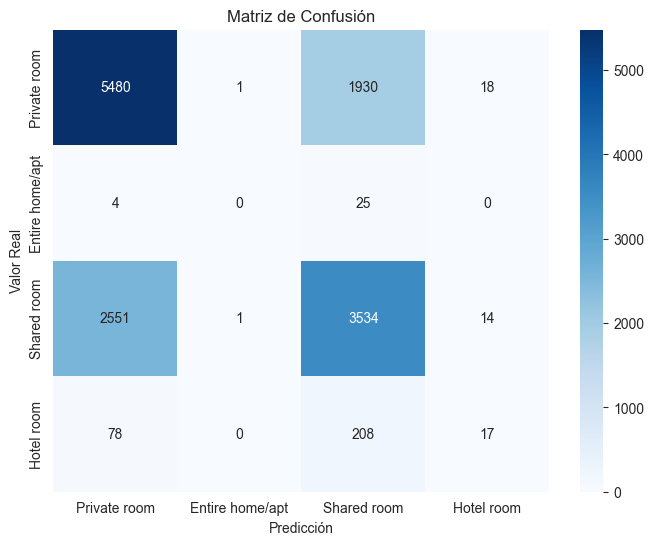

In [60]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['room_type'].unique(), yticklabels=df['room_type'].unique())
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

## Comparar resultados de modelos con validación cruzada
* Mostrar un dataframe de resultados con las métricas calculadas
* Mostrar boxplot de los resultados de validación cruzada como tiempos de ejecución y predicción y métricas

Cargamos el dataset y prepocesamos los datos

In [61]:
df = pd.read_csv('airbnb_nyc_clean.csv').sample(frac=0.5, random_state=42)
numeric_features = ['price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'review_rate_number', 'calculated_host_listings_count', 'availability_365']
categorical_features = ['neighbourhood_group', 'instant_bookable', 'cancellation_policy']

# Variables predictoras
X = df[numeric_features + categorical_features]
# Variable objetivo
y = df['room_type'].astype('category').cat.codes  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
df_resultados1 = pd.DataFrame(columns=['Modelo', 'Preprocesado', 'accuracy', 'precision', 'recall', 'f1'])
# Selector de características
feature_selector = SelectKBest(score_func=f_regression, k=15)  # Seleccionar las 15 mejores características

In [63]:
df_resultados1 = pd.DataFrame(columns=['Modelo', 'Preprocesado', 'accuracy', 'precision', 'recall', 'f1'])
def calculate_metrics1(preprocessor_name, X_train, X_test, y_train, y_test, pipeline=None, results_df=None):
      
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }
    
    rows = []
    for model_name, model in models.items():
        if pipeline:
            # Si se proporciona un pipeline, utiliza el pipeline completo
            full_pipeline = pipeline
            full_pipeline.steps[-1] = ('classifier', model)  # Reemplaza el último paso con el modelo actual
        else:
            # Si no se proporciona un pipeline, entrena solo el modelo
            full_pipeline = model
        
        # Entrenamiento
        full_pipeline.fit(X_train, y_train)        
        y_pred = full_pipeline.predict(X_test)
        
        
        df_resultados1.loc[len(df_resultados1)] = [model_name, preprocessor_name, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro', zero_division=0),
                                             recall_score(y_test, y_pred, average='macro', zero_division=0),f1_score(y_test, y_pred, average='macro', zero_division=0)]
    
    return df_resultados1.sort_values('accuracy', ascending=False)

In [64]:

numerical_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

# Pipeline para columnas numéricas
pipeline_numerical = Pipeline([
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', MinMaxScaler()), 
])

# Pipeline para columnas categóricas
pipeline_categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False))
])

# Unir los pipelines con ColumnTransformer
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_cols),
    ('categorical', pipeline_categorical, categorical_cols)
])

# Pipeline final con el selector de características y un modelo (esto será reemplazado dinámicamente)
pipeline = make_pipeline(
    pipeline_all,
    feature_selector,
)

# Llamar a la función calculate_metrics1
results = calculate_metrics1(
    preprocessor_name="Pipeline",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    pipeline=pipeline,
    results_df=df_resultados1
)

In [65]:
results_df = pd.DataFrame(results)
results_df

Modelo Preprocesado  accuracy  precision    recall        f1
2    Gradient Boosting     Pipeline  0.675372   0.566102  0.415245  0.440851
1        Random Forest     Pipeline  0.653585   0.387896  0.333341  0.330362
3                  SVM     Pipeline  0.591690   0.294093  0.298092  0.292405
0  Logistic Regression     Pipeline  0.574376   0.284708  0.291015  0.286638

## GridSearchCV para buscar mejores párametros en algún modelo

In [66]:

# Separar X e y
X = df.drop(columns=['price'])
y = df['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Identificar columnas numéricas y categóricas
numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list()
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
feature_selector = SelectKBest(score_func=f_regression, k=15)  # Seleccionar las 15 mejores características

# Pipeline para columnas numéricas
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para columnas categóricas
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar pipelines con ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Pipeline completo con modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector), 
    ('regressor', RandomForestRegressor(random_state=42))
])

# Definir la cuadrícula de parámetros
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Mejor score encontrado
best_score = -grid_search.best_score_
print(f"Mejor RMSE: {np.sqrt(best_score):.2f}")

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar en el conjunto de prueba
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE en el conjunto de prueba: {rmse:.2f}")
print(f"R² en el conjunto de prueba: {r2:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Mejor RMSE: 25.02
RMSE en el conjunto de prueba: 25.68
R² en el conjunto de prueba: 0.99


## Vectorizar el texto con TF-IDF y reducir la dimensionalidad con TruncatedSVD

In [67]:
def conv_txt(texto):
    # Verificar que el texto es una serie de pandas
    if isinstance(texto, pd.Series):
        texto = texto.tolist()

    # Crear una instancia de TfidfVectorizer
    vectorizer = TfidfVectorizer(
        max_features=500,  # Limitar el número máximo de características
        stop_words='english',  # Eliminar palabras comunes en inglés
        ngram_range=(1, 2)  # Considerar tanto palabras individuales como bigramas
    )

    # Ajustar y transformar el texto
    X_tfidf = vectorizer.fit_transform(texto)

    # Configurar TruncatedSVD
    svd = TruncatedSVD(n_components=50, random_state=42)  # Reducir a 50 componentes

    print(f"Forma de la matriz TF-IDF: {X_tfidf.shape}")

    # Ajustar y transformar la matriz TF-IDF utilizando SVD
    X_svd = svd.fit_transform(X_tfidf)

    # Convertir la matriz SVD en un DataFrame
    df_svd = pd.DataFrame(X_svd, columns=[f'svd_{i}' for i in range(50)])

    return df_svd

Comparamos antes y despues de la reducción

In [68]:
texto1 = df['name'].fillna('') # Usamos .fillna('') para manejar valores nulos en caso de que alguna fila tenga NaN en estas columnas.
df_svd1 = conv_txt(texto1)
df_svd1.head()

Forma de la matriz TF-IDF: (34652, 500)


svd_0     svd_1     svd_2     svd_3     svd_4     svd_5     svd_6  \
0  0.055897 -0.022788 -0.020315  0.001873 -0.001312  0.010707  0.025134   
1  0.142295 -0.115741 -0.076777  0.029955 -0.066185 -0.311979  0.124493   
2  0.295949  0.233543  0.029546 -0.044775 -0.052153  0.014862  0.013307   
3  0.303450  0.290379  0.049994 -0.049938 -0.058813 -0.005638 -0.054793   
4  0.299137 -0.429064  0.281029 -0.115021 -0.063924  0.274760 -0.052117   

      svd_7     svd_8     svd_9  ...    svd_40    svd_41    svd_42    svd_43  \
0  0.017362  0.025980 -0.023183  ...  0.023724 -0.038568 -0.018559 -0.027563   
1  0.075329 -0.134812 -0.303731  ... -0.024742 -0.012857  0.020914 -0.083033   
2  0.121184  0.034672  0.010722  ... -0.004820  0.007054  0.043708 -0.005639   
3  0.039860  0.051923  0.075790  ...  0.004615  0.003123  0.067660  0.073925   
4 -0.012944  0.105962 -0.016129  ... -0.060500 -0.003758  0.083481 -0.046711   

     svd_44    svd_45    svd_46    svd_47    svd_48    svd_49  
0 -0.057051  0.037357  0.037565  0.135313  0.027835  0.346967  
1 -0.028623 -0.000345 -0.032795 -0.054374  0.002696  0.003799  
2  0.023818  0.051063  0.024289  0.033164  0.043373  0.044381  
3  0.057918  0.031073  0.020652  0.057044  0.075198  0.128711  
4 -0.030371  0.043741  0.054797  0.054796 -0.004483  0.010148  

[5 rows x 50 columns]

In [69]:
texto2 = df['house_rules'].fillna('') 
df_svd2 = conv_txt(texto2)
df_svd2.head()

Forma de la matriz TF-IDF: (34652, 500)


svd_0     svd_1     svd_2     svd_3         svd_4     svd_5  \
0  1.000000e+00 -0.000002  0.000002  0.000001  3.043266e-07  0.000001   
1  6.712586e-07  0.589549  0.264653  0.058944 -1.380082e-01  0.662828   
2  1.000000e+00 -0.000002  0.000002  0.000001  3.043266e-07  0.000001   
3  6.842483e-07  0.272403 -0.166403 -0.175877  1.794177e-01  0.042424   
4  4.422768e-07  0.089086 -0.092227 -0.096914 -2.116282e-02 -0.008838   

      svd_6     svd_7     svd_8         svd_9  ...        svd_40  \
0  0.000001  0.000001  0.000001  3.897152e-07  ... -6.813358e-07   
1 -0.046136 -0.129476  0.010186  1.760660e-01  ...  2.135514e-03   
2  0.000001  0.000001  0.000001  3.897152e-07  ... -6.813358e-07   
3 -0.148430 -0.078926  0.621453  2.921069e-02  ...  3.442518e-02   
4 -0.116116  0.077104  0.003481 -9.647003e-02  ...  5.163301e-02   

         svd_41        svd_42        svd_43        svd_44        svd_45  \
0 -9.773316e-07 -1.810582e-07 -3.027036e-07  9.603432e-07 -4.839947e-07   
1  7.494391e-03  5.686692e-03  2.891495e-03 -1.168374e-02 -1.647117e-02   
2 -9.773316e-07 -1.810582e-07 -3.027036e-07  9.603432e-07 -4.839947e-07   
3 -6.705599e-02  1.237253e-02  3.975343e-02  2.061595e-02 -2.859034e-02   
4  1.064456e-01 -3.174283e-02  1.902969e-02  9.120038e-02 -7.288157e-02   

         svd_46        svd_47        svd_48        svd_49  
0  6.446421e-07  1.097369e-07 -6.064348e-07 -1.926338e-08  
1  1.987263e-03  3.552477e-03  1.370755e-02  4.985042e-03  
2  6.446421e-07  1.097369e-07 -6.064348e-07 -1.926338e-08  
3 -3.796419e-02 -3.319763e-02 -4.991550e-02 -2.740055e-02  
4 -8.251952e-03  1.336859e-01  9.297057e-03 -4.189891e-02  

[5 rows x 50 columns]

## SMOTE si hay desbalanceo para el problema de clasificación multiclase 'room_type'

In [70]:
df = pd.read_csv('airbnb_nyc_clean.csv')

X = df[['lat', 'long', 'price', 'service_fee', 'minimum_nights', 
        'number_of_reviews', 'reviews_per_month', 'review_rate_number', 
        'calculated_host_listings_count', 'availability_365', 'construction_year']]
y = df['room_type']

# Codificar la variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Verificar el desbalanceo antes de SMOTE
print("Distribución de clases antes de SMOTE:")
print(Counter(y_train))

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar el desbalanceo después de SMOTE
print("Distribución de clases después de SMOTE:")
print(Counter(y_train_resampled))

# Entrenar un modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Distribución de clases antes de SMOTE:
Counter({np.int64(0): 29770, np.int64(2): 24406, np.int64(3): 1176, np.int64(1): 92})
Distribución de clases después de SMOTE:
Counter({np.int64(0): 29770, np.int64(2): 29770, np.int64(3): 29770, np.int64(1): 29770})
Reporte de clasificación:
                 precision    recall  f1-score   support

Entire home/apt       0.73      0.75      0.74      7442
     Hotel room       0.27      0.39      0.32        23
   Private room       0.67      0.66      0.66      6102
    Shared room       0.43      0.22      0.29       294

       accuracy                           0.70     13861
      macro avg       0.52      0.51      0.50     13861
   weighted avg       0.69      0.70      0.69     13861



## Regresión sobre precio con TensorFlow-Keras

In [85]:
df = pd.read_csv('airbnb_nyc_clean.csv')
# Seleccionar columnas relevantes
columnas = [
    'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'instant_bookable',
    'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee',
    'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_rate_number',
    'calculated_host_listings_count', 'availability_365'
]

df = df[columnas]

X = df.drop(columns=['price'])  
y = df['price']

In [86]:
# Identificar columnas categóricas y numéricas
categorical_features = ['neighbourhood_group', 'neighbourhood', 'cancellation_policy', 'room_type', 'instant_bookable']
numeric_features = X.columns.difference(categorical_features)

# Crear transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Aplicar el preprocesamiento
X_preprocessed = preprocessor.fit_transform(X)
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [87]:
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
# Definir el modelo
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'), # input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida para regresión
])

# 2. Compilar el modelo: especificar función coste, optimizador, métricas
model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), # MAE
        keras.metrics.RootMeanSquaredError(), # RMSE
        keras.metrics.MeanAbsolutePercentageError() # MAPE
    ]
)

In [88]:
# Entrenar el modelo
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 118765.9062 - mean_absolute_error: 183.0988 - mean_absolute_percentage_error: 37.3272 - root_mean_squared_error: 311.8553 - val_loss: 564.9019 - val_mean_absolute_error: 7.3130 - val_mean_absolute_percentage_error: 2.3425 - val_root_mean_squared_error: 23.7677
Epoch 2/30
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 758.0312 - mean_absolute_error: 7.8236 - mean_absolute_percentage_error: 2.3641 - root_mean_squared_error: 27.4586 - val_loss: 565.9258 - val_mean_absolute_error: 7.4565 - val_mean_absolute_percentage_error: 2.1960 - val_root_mean_squared_error: 23.7892
Epoch 3/30
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 754.4151 - mean_absolute_error: 8.0678 - mean_absolute_percentage_error: 2.1803 - root_mean_squared_error: 27.3895 - val_loss: 623.5190 - val_mean_absolute_error: 10.6448 - val_mean_absolute_percentage_error: 2.7333 - val_root_mean_squared_error: 24.9704
Epoch 4/30
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 3s

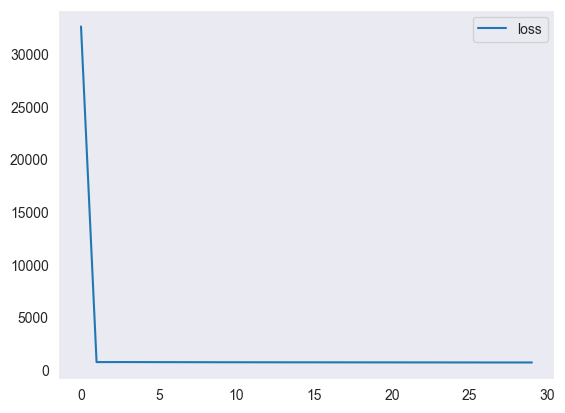

In [89]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.grid()
plt.legend()
plt.show()

In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,485 (517.52 KB)

 Trainable params: 44,161 (172.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,324 (345.02 KB)

In [91]:
df_results = pd.DataFrame(model.history.history)
df_results.head(10)

loss  mean_absolute_error  mean_absolute_percentage_error  \
0  32668.642578            61.905296                       15.296268   
1    742.266052             7.888804                        2.345279   
2    743.841919             8.241136                        2.236643   
3    744.722107             8.413437                        2.199539   
4    741.483826             8.403236                        2.165829   
5    738.329712             8.349351                        2.134841   
6    736.028015             8.322746                        2.120358   
7    733.758911             8.275814                        2.103328   
8    730.830750             8.215190                        2.075525   
9    728.222778             8.161183                        2.055327   

   root_mean_squared_error    val_loss  val_mean_absolute_error  \
0               180.744690  564.901917                 7.313011   
1                27.244560  565.925842                 7.456533   
2                27.273466  623.518982                10.644761   
3                27.289597  584.914612                 8.695247   
4                27.230200  573.848572                 8.109930   
5                27.172224  573.485046                 8.096486   
6                27.129837  573.498657                 8.123447   
7                27.087984  574.252014                 8.179853   
8                27.033882  574.796814                 8.244739   
9                26.985603  575.484375                 8.256621   

   val_mean_absolute_percentage_error  val_root_mean_squared_error  
0                            2.342508                    23.767666  
1                            2.196025                    23.789196  
2                            2.733333                    24.970362  
3                            2.328823                    24.185007  
4                            2.203137                    23.955137  
5                            2.186565                    23.947548  
6                            2.225705                    23.947832  
7                            2.225952                    23.963556  
8                            2.262490                    23.974920  
9                            2.274026                    23.989256

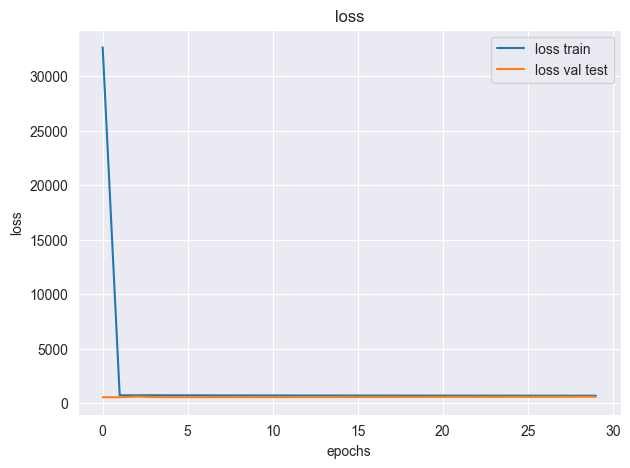

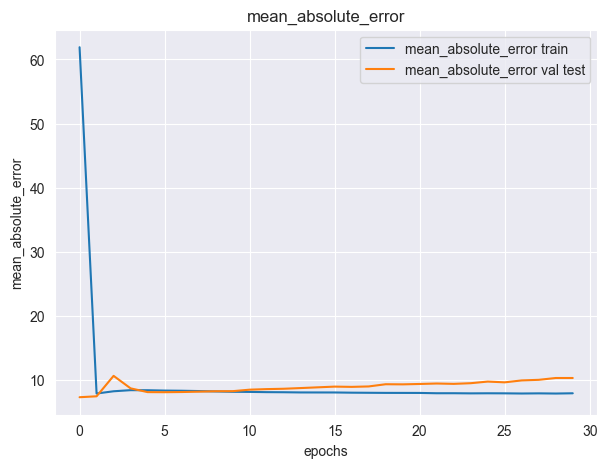

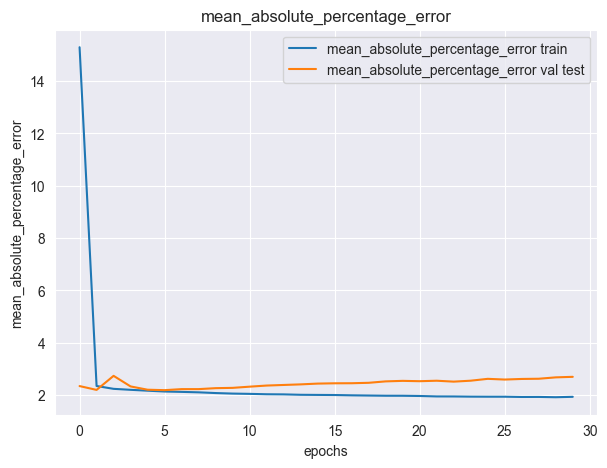

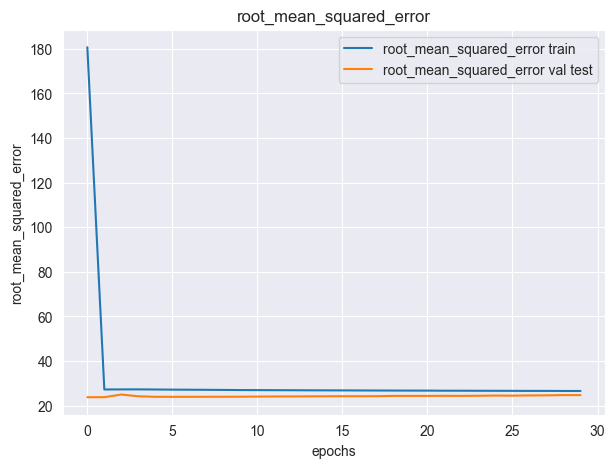

In [93]:
def plot_history(df_history):

    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 5))
        plt.plot(df_history[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'{metric} val test')
            
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        
plot_history(df_results)

In [94]:
test_mse_loss, test_mae, test_rmse, test_mape = model.evaluate(X_test, y_test, verbose=1)
print('test_mse_loss', test_mse_loss)
print('test_mae', test_mae)
print('test_rmse', test_rmse)
print('test_mape', test_mape)

434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 796.3238 - mean_absolute_error: 10.6058 - mean_absolute_percentage_error: 2.7860 - root_mean_squared_error: 28.0498
test_mse_loss 746.6615600585938
test_mae 10.551544189453125
test_rmse 27.325109481811523
test_mape 2.738144874572754


In [95]:
model.predict(X_test)[:5] # 2D

434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[984.8903 ],
       [928.21594],
       [366.9458 ],
       [228.88606],
       [813.0921 ]], dtype=float32)

In [97]:
print('mae test', mean_absolute_error(y_test, y_pred))
print('rmse test', root_mean_squared_error(y_test, y_pred))
print('mape test', mean_absolute_percentage_error(y_test, y_pred))

mae test 621.419306811518
rmse test 703.9393713342739
mape test 0.9975042016991142


In [98]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred, 'residuo': y_test - y_pred})
df_comparison.head()

real  prediccion  residuo
35506  984.0           2    982.0
29773  941.0           0    941.0
46706  368.0           0    368.0
42199  232.0           0    232.0
2868   827.0           2    825.0

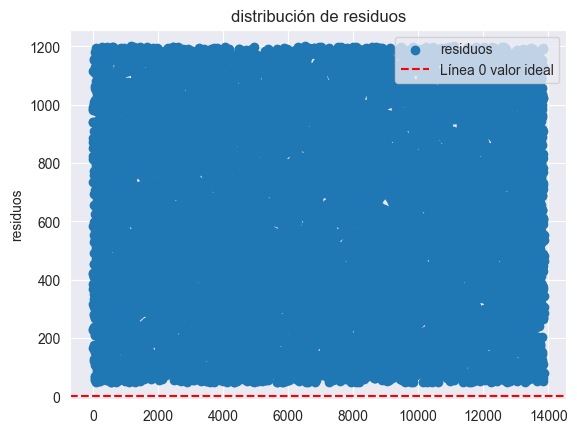

In [99]:
plt.scatter(range(len(df_comparison)), df_comparison['residuo'], label='residuos')
plt.axhline(y=0, color='r', linestyle='dashed', label='Línea 0 valor ideal')
plt.ylabel('residuos')
plt.title('distribución de residuos')
plt.legend();